# DSI-23 Capstone Project: Analysis on COVID-19 Pfizer/BioNtech Vaccine Tweets (Topic Modelling)

### Contents:
- [Data Import](#Data-Import)
- [Topic Modelling](#Topic-Modelling)
- [Topic Modelling (within each sentiment)](#Topic-Modelling-(within-each-sentiment))
- [Results](#Results)
- [Conclusions & Recommendations](#Conclusions-&-Recommendations)
- [Final Thoughts](#Final-Thoughts)


## Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.io as pio
#set 'svg' as default renderer to show plots on git, 'notebook' for interactive mode on jupyter notebook
pio.renderers.default = "svg" 
%matplotlib inline

import re
from bertopic import BERTopic

In [2]:
data = pd.read_csv('../data/pfizer_tweets.csv')

In [3]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,compound,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.4019,Positive
1,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.2500,Positive
2,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,False,2020-12-12 20:17:19,explain to me again why we need a vaccine bori...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.0000,Neutral
3,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,False,2020-12-12 20:01:16,covid vaccine; you getting it? covidvaccine co...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,0.0000,Neutral
4,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.0000,Neutral


## Topic Modelling

[By using document embeddings, there is typically no need to preprocess the data, as all parts of a document are important in understanding the general topic of the document](https://maartengr.github.io/BERTopic/faq.html). Keeping the original structure of the text is especially important for transformer-based models to understand the context.

In [5]:
topic_model = BERTopic(embedding_model="paraphrase-mpnet-base-v2", language="english", nr_topics='auto', calculate_probabilities=True)
topics, probabilities = topic_model.fit_transform(data['text'])

NOTE: BERTopic is stochastic, which means that the topics will differ across runs. This is due to the stochastic nature of UMAP. As such, we have to save the model to retain the same output.


In [ ]:
topic_model.save("../models/topic_model")

In [3]:
#uncomment to load model
#topic_model = BERTopic.load("../models/topic_model")

In [8]:
topic_model.get_topic_freq().head()

,Topic,Count
0,-1,6121
1,0,708
2,1,477
3,2,462
4,3,408


-1 refers to all outliers which do not have a topic assigned. Afterwards we have the topics with the highest frequencies, starting from topic 0, 1, etc.

In [9]:
#preview words found in the most frequent topic - topic 0
topic_model.get_topic(0)

[('covidvaccine', 0.022014203937562423),
 ('covid19vaccine', 0.017917874003756405),
 ('covidvaccination', 0.01132853275151237),
 ('covidvaccines', 0.009851163844256286),
 ('pfizercovidvaccine', 0.008996808700450701),
 ('covidvaccineseu', 0.0077441299853184),
 ('covidvaccineprices', 0.0077441299853184),
 ('covidvacccine', 0.00702872959664002),
 ('covidvac', 0.005515683360628481),
 ('covid19vaccination', 0.005128511982379413)]

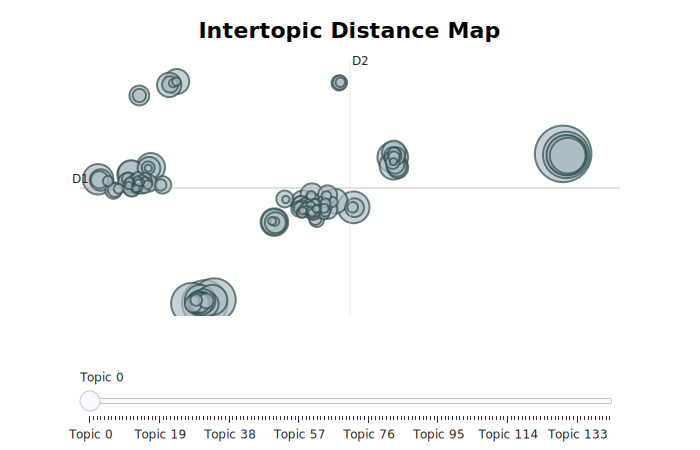

In [10]:
#visualize topic clusters
fig = topic_model.visualize_topics()
fig.show()
fig.write_html("../visuals/topic_model_cluster.html")

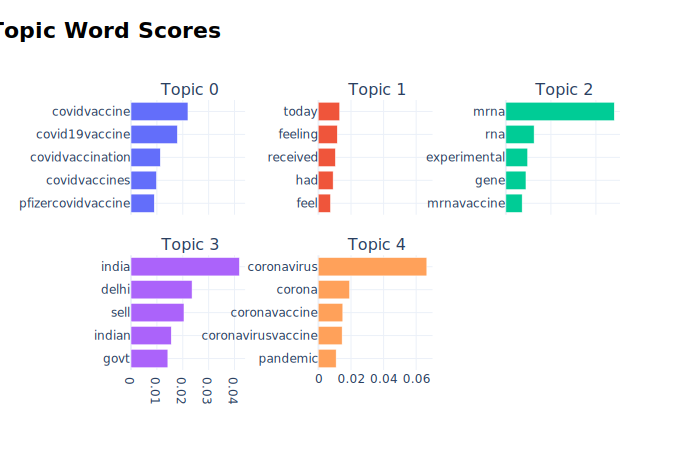

In [11]:
#visualize the selected terms for top 5 topics
fig = topic_model.visualize_barchart(top_n_topics=5, width=1000)
fig.show()
fig.write_html("../visuals/top5_topics.html")

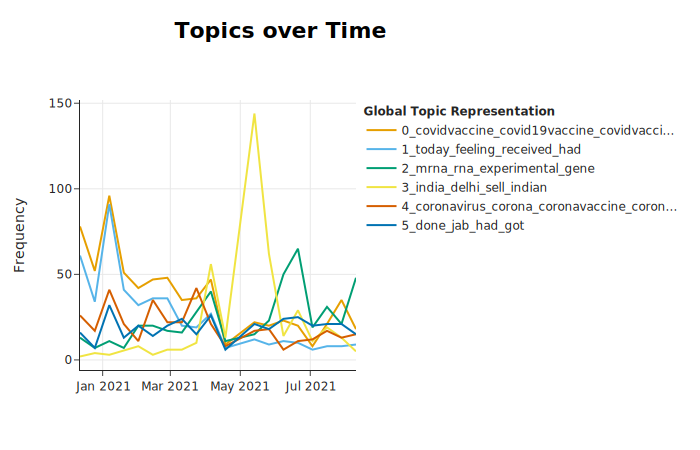

In [12]:
#visualize frequency of the topics over time
topics_over_time = topic_model.topics_over_time(data['text'], topics, data['date'], nr_bins=20)
fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6)
fig.show()
fig.write_html("../visuals/topics_over_time.html")

## Topic Modelling (within each sentiment)

In [14]:
Positive_tweets = data[data['sentiment']=='Positive'].reset_index(drop=True)
Negative_tweets = data[data['sentiment']=='Negative'].reset_index(drop=True)
Neutral_tweets = data[data['sentiment']=='Neutral'].reset_index(drop=True)

### Positive Sentiment

In [ ]:
topic_positive = BERTopic(embedding_model="paraphrase-mpnet-base-v2", language="english", nr_topics='auto', calculate_probabilities=True)
topics, probabilities = topic_positive.fit_transform(Positive_tweets['text'])

In [ ]:
topic_positive.save("../models/topic_positive")

In [15]:
#uncomment to load model
#topic_positive = BERTopic.load("../models/topic_positive")

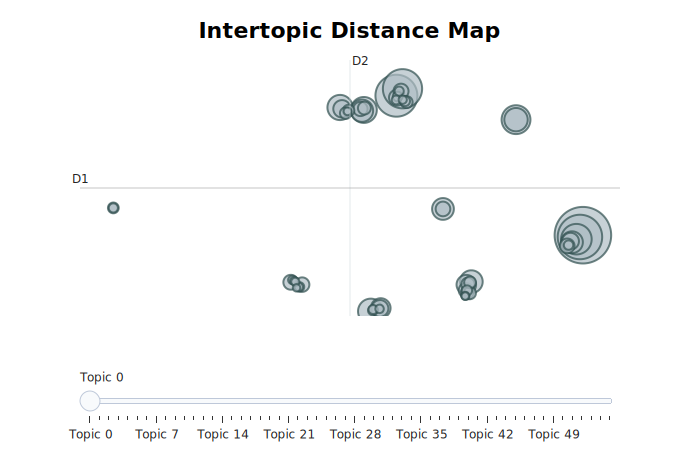

In [18]:
fig = topic_positive.visualize_topics()
fig.show()
fig.write_html("../visuals/positive_cluster.html")

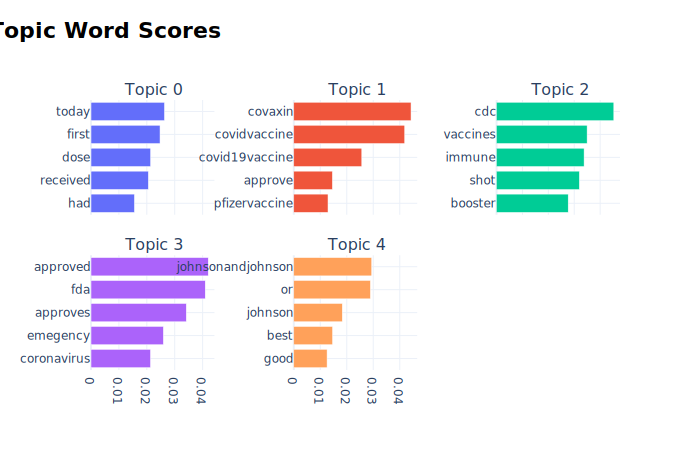

In [19]:
fig = topic_positive.visualize_barchart(top_n_topics=5, width=1100)
fig.show()
fig.write_html("../visuals/top5_positive_topics.html")

### Negative Sentiment

In [ ]:
topic_negative = BERTopic(embedding_model="paraphrase-mpnet-base-v2", language="english", nr_topics='auto', calculate_probabilities=True)
topics, probabilities = topic_negative.fit_transform(Negative_tweets['text'])

In [ ]:
topic_negative.save("../models/topic_negative")

In [20]:
#uncomment to load model
#topic_negative = BERTopic.load("../models/topic_negative")

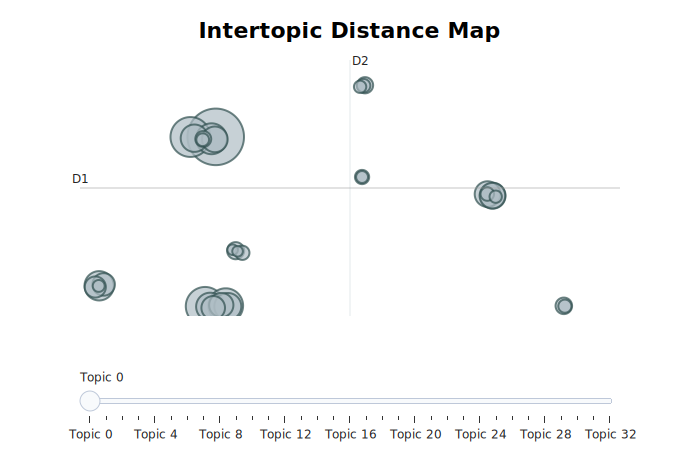

In [22]:
fig = topic_negative.visualize_topics()
fig.show()
fig.write_html("../visuals/negative_cluster.html")

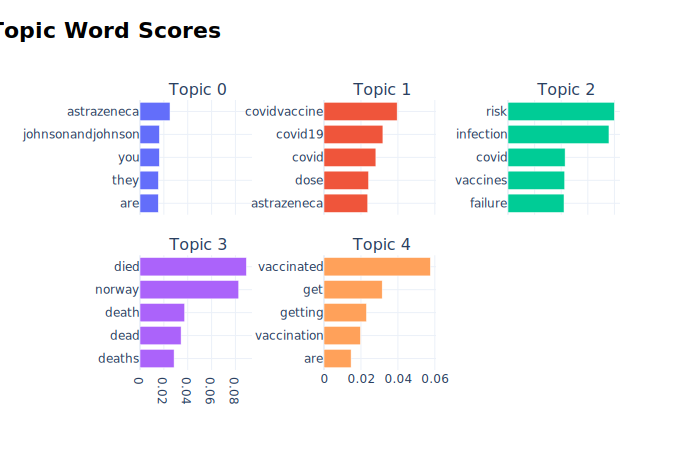

In [21]:
fig = topic_negative.visualize_barchart(top_n_topics=5, width=1000)
fig.show()
fig.write_html("../visuals/top5_negative_topics.html")

### Neutral Sentiment

In [ ]:
topic_neutral = BERTopic(embedding_model="paraphrase-mpnet-base-v2", language="english", nr_topics='auto', calculate_probabilities=True)
topics, probabilities = topic_neutral.fit_transform(Neutral_tweets['text'])

In [ ]:
topic_neutral.save("../models/topic_neutral")

In [23]:
#uncomment to load model
#topic_neutral = BERTopic.load("../models/topic_neutral")

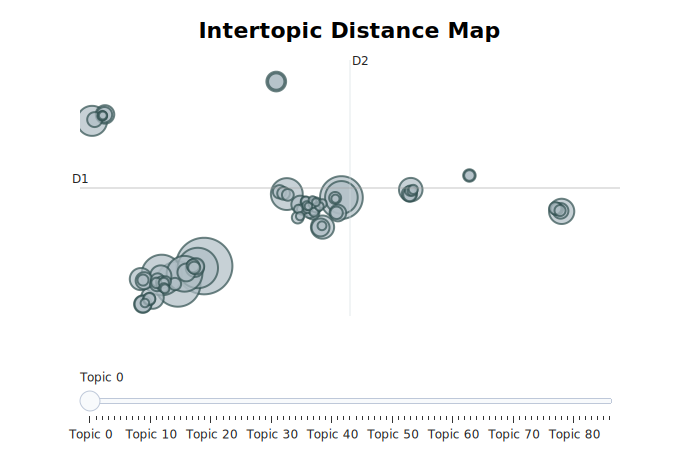

In [25]:
fig = topic_neutral.visualize_topics()
fig.show()
fig.write_html("../visuals/neutral_cluster.html")

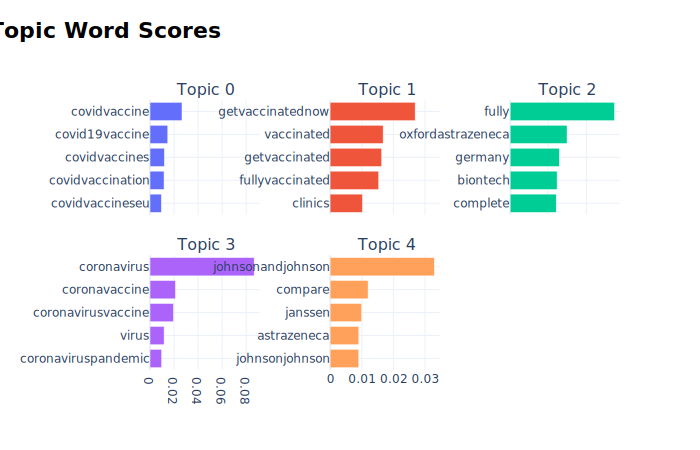

In [26]:
fig = topic_neutral.visualize_barchart(top_n_topics=5, width=1100)
fig.show()
fig.write_html("../visuals/top5_neutral_topics.html")

## Results

Having ran topic modelling on each of the sentiment groups, we were able to get a clearer idea on the topics which people felt positive / negative / neutral towards.

In the positive tweets, people mainly talked about their experiences on taking the vaccine, the FDA approval, and the Johnson & Johnson vaccine. 

In the negative tweets, people talked about the Astra Zeneca vaccine, death cases, and vaccine failures. 

Lastly, in the neutral tweets, people talked had general discussions on COVID-19 vaccines, getting vaccinated, and comparisons between the different vaccines.

## Conclusions & Recommendations

From the uncovered results, we can identify potential interventions for Pfizer/BioNtech to take in order to speed up the global vaccination progress (and also drive revenue by increasing their vaccine sales).

1. Although the Pfizer/BioNtech vaccine received the FDA approval on 23 Aug 2021, it was preceded with negative sentiment about how the vaccine is less effective against the Delta variant (Israel outbreak). In order to leverage on the FDA approval status, the company will have to address this controversy - if it's true, perhaps more R&D will have to be invested into a 'vaccine upgrade'. From the sentiment analysis, we saw that the highest negative spike was due to the Delta variant outbreak in India. As such, if Pfizer/BioNtech is able to effectively combat the Delta variant, that would highly increase the vaccine's marketability. 


2. As seen from the sentiment distribution within each country, there is no obvious country with tremendously positive sentiment towards the Pfizer/BioNtech vaccine. As such, when it comes to location targeting, the company should look towards countries with the large populations and lowest vaccination rates. There is higher urgency in those countries and their government bodies will be more compelled to listen.


3. The Johnson & Johnson vaccine was received positively [due to its effectiveness against the Delta variant](https://www.jnj.com/positive-new-data-for-johnson-johnson-single-shot-covid-19-vaccine-on-activity-against-delta-variant-and-long-lasting-durability-of-response). In return, the Astra Zeneca vaccine has had [a negative history of problems](https://www.cnbc.com/2021/03/25/astrazeneca-covid-vaccine-all-the-issues-and-problems-the-shot-has-faced.html). The company should study other vaccine manufacturers and learn directly from their competitors.


## Final Thoughts

I started this project to identify the countries where people felt mostly positive or negative towards the Pfizer/BioNtech vaccine. That way, Pfizer/BioNtech would know which countries to target or avoid. Unfortunately, the sentiment distribution within each country was typically evenly spread out - there is no obvious recommendation that can be made in this regard.

Having performed sentiment analysis and topic modelling, I am somewhat satisfied with the results, as the stories derived from both techniques not only complement each other, but also line up with reality. 

COVID-19 is very relevant to everyone and it is very easy to determine if the interpretation from the data makes sense - we just have to cross reference the news, if it adds up then it's all good. 

However, in terms of business applications, I was rather disappointed as there wasn't any ground-breaking findings. It made me realize that doing this project on a global scale made it less actionable. When it comes to interventions to speed up vaccination progress, it's more realistic to tackle it from a domestic angle. Every country comes with its own unique sets of problems and regulations, and without considering those, it became very difficult to come up with concrete recommendations.